In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from library_simulator import LibrarySimulator, util

/Users/harmsm/miniconda3/lib/python3.6/site-packages/library_simulator-0.1-py3.6.egg/library_simulator/mutation_spectra ['/Users/harmsm/miniconda3/lib/python3.6/site-packages/library_simulator-0.1-py3.6.egg/library_simulator/mutation_spectra/empirical.csv', '/Users/harmsm/miniconda3/lib/python3.6/site-packages/library_simulator-0.1-py3.6.egg/library_simulator/mutation_spectra/published.csv', '/Users/harmsm/miniconda3/lib/python3.6/site-packages/library_simulator-0.1-py3.6.egg/library_simulator/mutation_spectra/flat.csv']


#### Create an experiment.  

The fasta file should be a DNA sequence for the gene.

There are a few mutation spectra defined in the library:
+ `published` (the spectrum from the manual)
+ `empirical` (an empirical spectrum I measured for the enzyme 3/17/10)
+ `flat` (all types of sequence changes equally likely)

In [2]:
lib = LibrarySimulator("example.fasta",mutation_spectrum="published")

#### Generate a library

This will make 10 mutants with a mutation rate of 2.  This assumes that the number of mutations per mutant follows a Poisson distribution.

In [3]:
lib.simulate(num_samples=10,mutation_rate=2)

#### Access the mutants that were generated.

+ `aa`: amino acid changes (`*`: new stop codon)
+ `base`: base changes (`-` and `+` are insertions and deletions)
+ `num`: total number of amino acid changes (could be a huge number if there is an early stop or indel)
+ `indel`: whether or not there is an indel
+ `stop`: whether or not there is new stop codon
+ `start`: whether or not the real start codon was messed up

In [4]:
lib.clones

,aa,base,num,indel,stop,start
0,,,0,False,False,False
1,,A77T,0,False,False,False
2,"M0T,F124Y","T1C,T373A",2,False,True,True
3,"G140R,P145R,Y160M","C421A,T436A,C480A",3,False,False,False
4,,T235G,0,False,False,False
5,K126N,"A128T,G380A",1,False,False,False
6,G86R,T258C,1,False,False,False
7,G58A,C175T,1,False,False,False
8,,G360A,0,False,False,False
9,"F182P,K218G","T547C,T655A",2,False,False,False


#### Simulate libraries with increasing mutation rates and plot
Increasing the number of samples will make the curves smoother, but will also make the calculation slower.

,mut_rate,0,1,2,3,4,5,6,7+,dead
0,0.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.512821,0.72,0.19,0.02,0.00,0.00,0.00,0.00,0.00,0.07
2,1.025641,0.54,0.22,0.10,0.01,0.01,0.00,0.00,0.00,0.12
3,1.538462,0.32,0.25,0.16,0.05,0.01,0.00,0.00,0.00,0.21
4,2.051282,0.33,0.26,0.16,0.05,0.02,0.00,0.00,0.00,0.18
5,2.564103,0.22,0.23,0.11,0.07,0.04,0.01,0.01,0.00,0.31
6,3.076923,0.05,0.21,0.13,0.14,0.04,0.01,0.00,0.01,0.41
7,3.589744,0.10,0.10,0.24,0.17,0.05,0.04,0.00,0.00,0.30
8,4.102564,0.12,0.11,0.18,0.07,0.02,0.01,0.00,0.00,0.49
9,4.615385,0.03,0.11,0.16,0.15,0.06,0.04,0.01,0.00,0.44


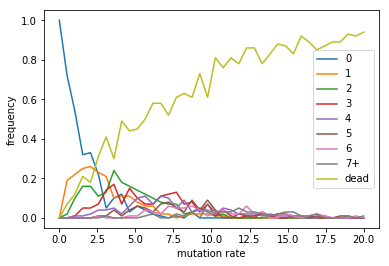

In [5]:
f_v_r = util.freq_vs_mutation_rate(lib,num_samples=100)
util.plot_freq_vs_mutation_rate(f_v_r)
f_v_r